In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
mean = [0.0,1.0]
cov = [[1.0,0.5],
       [0.5,1.0]]

In [3]:
x_axis = np.linspace(-5, 5, 100)  #-5から5まで100刻みでリストを作る
y_axis = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_axis,y_axis) #x_axisとy_axisから平面上の格子を作る

###bivariate_normal: 二次元のガウス分布の値を格子に対して求めるメソッド###
Z = mlab.bivariate_normal(X, Y, # 格子の座標
                          math.sqrt(cov[0][0]),math.sqrt(cov[1][1]),# x,yの標準偏差
                          mean[0], mean[1], # 平均
                          cov[0][1])            # 共分散

In [4]:
print(Z)

[[  1.94477878e-10   2.52870288e-10   3.24352488e-10 ...,   6.93630256e-27
    2.41025817e-27   8.26210921e-28]
 [  3.09481050e-10   4.05149904e-10   5.23225924e-10 ...,   2.13519682e-26
    7.47011919e-27   2.57815475e-27]
 [  4.85836066e-10   6.40361942e-10   8.32632021e-10 ...,   6.48394967e-26
    2.28393287e-26   7.93631447e-27]
 ..., 
 [  2.24670033e-18   5.65091502e-18   1.40211694e-17 ...,   4.99767460e-07
    3.35930581e-07   2.22752681e-07]
 [  9.55469750e-19   2.41960599e-18   6.04455308e-18 ...,   4.11136278e-07
    2.78241206e-07   1.85758600e-07]
 [  4.00848783e-19   1.02202698e-18   2.57060879e-18 ...,   3.33653326e-07
    2.27344885e-07   1.52815270e-07]]


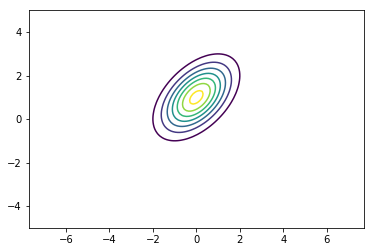

In [5]:
plt.contour(X, Y, Z)
plt.axis("equal")
plt.show()

In [6]:
from matplotlib.patches import Ellipse

In [7]:
class Gaussian2D():
    def __init__(self, mean, cov):
        self.mean = mean
        self.cov = cov
    def value(self, x, y):
        pos = np.array([[x],[y]])
        delta = pos - self.mean
        numerator = math.exp(-0.5 * (delta.T).dot(np.linalg.inv(self.cov)).dot(delta))
        denominator = 2 * math.pi * math.sqrt(np.linalg.det(self.cov))
        return numerator / denominator
    def shift(self, delta, angle):
        ca = math.cos(angle)
        sa = math.sin(angle)
        rot = np.array([[ca,-sa],[sa,ca]])
        
        self.cov = rot.dot(self.cov).dot(rot.T) #共分散行列を回転行列で挟む
        self.mean = self.mean + delta
    def ellipse(self, color='blue'):
        eig_vals,eig_vec = np.linalg.eig(self.cov)
        
        v1 = eig_vals[0] * eig_vec[:,0]
        v2 = eig_vals[1] * eig_vec[:,1]
        v1_direction = math.atan2(v1[1],v1[0])
        
        e = Ellipse(self.mean,width=np.linalg.norm(v1),height=np.linalg.norm(v2),angle=v1_direction/math.pi*180)
        e.set_facecolor(color)
        e.set_alpha(0.2)
        
        return e

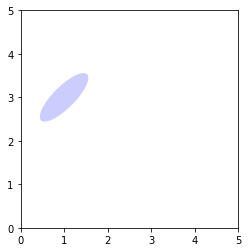

In [8]:
p = Gaussian2D(np.array([[1.0],[3.0]]),
               np.array([[1.0,0.5],
                         [0.5,1.0]]))

fig = plt.figure(0)
sp = fig.add_subplot(111, aspect='equal')
plt.xlim(0,5)
plt.ylim(0,5)
sp.add_artist(p.ellipse())
plt.show()

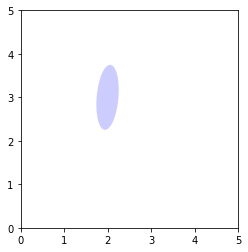

In [9]:
p.shift(np.array([[1.0],[0.0]]),math.radians(40))
fig = plt.figure(0)
sp = fig.add_subplot(111, aspect='equal')

plt.xlim(0,5)
plt.ylim(0,5)
sp.add_artist(p.ellipse())
plt.show()

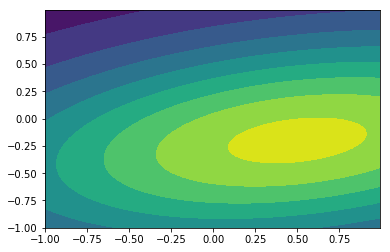

In [10]:
from scipy.stats import multivariate_normal

rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]]) #rv : random variable 確率変数

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
plt.contourf(x, y, rv.pdf(pos))